{'yes': 2, 'no': 3}
{'no': 2}
{'yes': 2, 'no': 1}
{'no': 1}
{'yes': 2, 'no': 2}
{'yes': 2, 'no': 1}
{'no': 1}
{'yes': 2}


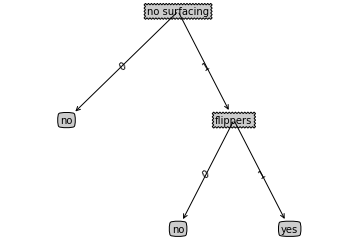

In [1]:
from math import log
import matplotlib.pyplot as plt  
%matplotlib inline 

#定义文本框和箭头格式  
decisionNode = dict(boxstyle="sawtooth", fc="0.8") #定义判断节点形态  
leafNode = dict(boxstyle="round4", fc="0.8") #定义叶节点形态  
arrow_args = dict(arrowstyle="<-") #定义箭头  
  
#绘制带箭头的注解  
#nodeTxt：节点的文字标注, centerPt：节点中心位置,  
#parentPt：箭头起点位置（上一节点位置）, nodeType：节点属性  
def plotNode(nodeTxt, centerPt, parentPt, nodeType):  
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',  
             xytext=centerPt, textcoords='axes fraction',  
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )  
    
#计算叶节点数  
def getNumLeafs(myTree):  
    numLeafs = 0  
    firstStr = list(myTree.keys())[0]   
    secondDict = myTree[firstStr]   
    for key in list(secondDict.keys()):  
        if type(secondDict[key]).__name__=='dict':#是否是字典  
            numLeafs += getNumLeafs(secondDict[key]) #递归调用getNumLeafs  
        else:   numLeafs +=1 #如果是叶节点，则叶节点+1  
    return numLeafs  
  
#计算数的层数  
def getTreeDepth(myTree):  
    maxDepth = 0  
    firstStr = list(myTree.keys())[0]  
    secondDict = myTree[firstStr]  
    for key in list(secondDict.keys()):  
        if type(secondDict[key]).__name__=='dict':#是否是字典  
            thisDepth = 1 + getTreeDepth(secondDict[key]) #如果是字典，则层数加1，再递归调用getTreeDepth  
        else:   thisDepth = 1  
        #得到最大层数  
        if thisDepth > maxDepth:  
            maxDepth = thisDepth  
    return maxDepth  

#在父子节点间填充文本信息  
#cntrPt:子节点位置, parentPt：父节点位置, txtString：标注内容  
def plotMidText(cntrPt, parentPt, txtString):  
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]  
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]  
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)  
    
#绘制树形图  
#myTree：树的字典, parentPt:父节点, nodeTxt：节点的文字标注  
def plotTree(myTree, parentPt, nodeTxt):  
    numLeafs = getNumLeafs(myTree)  #树叶节点数  
    depth = getTreeDepth(myTree)    #树的层数  
    firstStr = list(myTree.keys())[0]     #节点标签  
    #计算当前节点的位置  
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)  
    plotMidText(cntrPt, parentPt, nodeTxt) #在父子节点间填充文本信息  
    plotNode(firstStr, cntrPt, parentPt, decisionNode) #绘制带箭头的注解  
    secondDict = myTree[firstStr]  
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD  
    for key in secondDict.keys():  
        if type(secondDict[key]).__name__=='dict':#判断是不是字典，  
            plotTree(secondDict[key],cntrPt,str(key))        #递归绘制树形图  
        else:   #如果是叶节点  
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW  
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)  
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))  
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD  
  
#创建绘图区  
def createPlot(inTree):  
    fig = plt.figure(1, facecolor='white')  
    fig.clf()  
    axprops = dict(xticks=[], yticks=[])  
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)      
    plotTree.totalW = float(getNumLeafs(inTree)) #树的宽度  
    plotTree.totalD = float(getTreeDepth(inTree)) #树的深度  
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;  
    plotTree(inTree, (0.5,1.0), '')  
    plt.show()  

#创建数据集  
def createDataSet():  
    dataSet = [[1, 1, 'yes'],  
               [1, 1, 'yes'],  
               [1, 0, 'no'],  
               [0, 1, 'no'],  
               [0, 1, 'no']]  
    labels = ['no surfacing','flippers']  
    return dataSet, labels  

def calcShannonEnt(dataSet):  
    numEntries = len(dataSet)   #数据的个数  
    labelCounts = {}   
    for featVec in dataSet:   
        currentLabel = featVec[-1]  #数据集最后一列作为当前标签  
        if currentLabel not in labelCounts.keys(): #如果当前标签不存在，则加入字典  
            labelCounts[currentLabel] = 0  
        labelCounts[currentLabel] += 1  #记录当前类别出现次数  
    print(labelCounts)
    shannonEnt = 0.0  
    for key in labelCounts:  
        prob = float(labelCounts[key])/numEntries   #计算各标签出现概率  
        shannonEnt -= prob * log(prob,2)    #计算香农熵  
    return shannonEnt  

#参数axis是特征的index，参数value是特征的值  
#划分数据集（删除featVec[axis] == value项，显示其余的项）  
def splitDataSet(dataSet, axis, value):  
    retDataSet = []  
    for featVec in dataSet:  
        if featVec[axis] == value:  
            reducedFeatVec = featVec[:axis]      
            reducedFeatVec.extend(featVec[axis+1:])  
            retDataSet.append(reducedFeatVec)  
    return retDataSet  

def chooseBestFeatureToSplit(dataSet):  
    numFeatures = len(dataSet[0]) - 1      #最后一列是标签，其余的是特征  
    baseEntropy = calcShannonEnt(dataSet)  
    bestInfoGain = 0.0; bestFeature = -1  
    for i in range(numFeatures):        #遍历所有特征  
        featList = [example[i] for example in dataSet]#第i列所有特征  
        uniqueVals = set(featList)       #得到第i列不重复的特征，set用法见后面分析  
        newEntropy = 0.0  
        for value in uniqueVals:          
            subDataSet = splitDataSet(dataSet, i, value) #对每个特征划分数据集  
            prob = len(subDataSet)/float(len(dataSet))        
            newEntropy += prob * calcShannonEnt(subDataSet) #计算新数据集的熵  
        #计算划分后的信息增益，得到最大增益  
        infoGain = baseEntropy - newEntropy       
        if (infoGain > bestInfoGain):         
            bestInfoGain = infoGain           
            bestFeature = i  
    return bestFeature   

#返回出现次数最多的类  
def majorityCnt(classList):  
    classCount={}  
    for vote in classList:  
        if vote not in classCount.keys():  
            classCount[vote] = 0  
        classCount[vote] += 1  
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)  
    return sortedClassCount[0][0] #返回字典中的第一个值，也就是出现次数最多的类  
  
def createTree(dataSet,labels):  
    classList = [example[-1] for example in dataSet]    #最后一列是类别  
    if classList.count(classList[0]) == len(classList): #所有类标签相同，则返回该类标签  
        return classList[0]  
    if len(dataSet[0]) == 1:    #进行递归的过程中，特征会减少，当特征只有一个时（只有一列时），返回该列出现次数最多的标签  
        return majorityCnt(classList)  
    bestFeat = chooseBestFeatureToSplit(dataSet) #返回最佳特征的索引  
    bestFeatLabel = labels[bestFeat]    #该索引对应的标签  
      
    myTree = {bestFeatLabel:{}}  
    del(labels[bestFeat])    # 每个标签只划分一次，所以标签会减少  
    # 根据最佳特征索引所对应的列的不同值, 划分成不同节点, 再对每个节点递归建树  
    featValues = [example[bestFeat] for example in dataSet] #返回最佳特征的索引对应的列的不同值  
    uniqueVals = set(featValues)  
    for value in uniqueVals:  
        subLabels = labels[:]       # 复制类标签  
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)  
    return myTree     

myDat,labels = createDataSet()  
myTree = createTree(myDat,labels)  
createPlot(myTree) 